In [20]:
graphics_toolkit("gnuplot"); % use if "plot" does not work

## Finite element method (FEM) in 1d
Implement the material input in the form of a function, e.g. k=@(x)1+x.^2; <br>
for constant functions, the solution can again be compared to the analytical one.


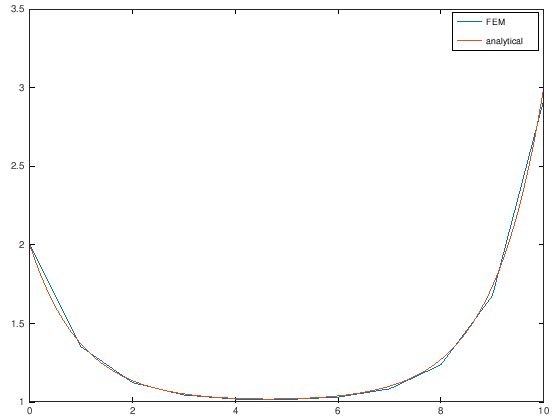

In [28]:
%% boundary value problem:
%   -k*u''(x)+k0*u(x)=g
%   u(0)=U
%   -k*u'(L)=T

k=@(x)+x.*0+1;
k0=1; 
L=10;
f=1; Uhat=0; g=f+k0*Uhat;
U=2;
T=-2;

%% network
N=10;
POINTS=linspace(0,L,N+1)';
n_POINTS=size(POINTS,1);
ELEMENTS=[(1:n_POINTS-1)' (2:n_POINTS)'];
n_ELEMENTS=size(ELEMENTS,1);
DBOUNDARY=1;
DVALUE=U;
FREENODE=true(n_POINTS,1); FREENODE(DBOUNDARY)=false;
NBOUNDARY=n_POINTS;
NVALUE=T;
LENGTHS=POINTS(ELEMENTS(:,2))-POINTS(ELEMENTS(:,1));
CENTERS=sum(POINTS(ELEMENTS),2)/2;
MATERIALS=k(CENTERS);
F=g*ones(n_ELEMENTS,1);
MATERIALS0=k0*ones(n_ELEMENTS,1);

%% local matrices and rhs
A_local=[1 -1; -1 1];
M_local=[1/3 1/6; 1/6 1/3];
b_local=[1/2; 1/2];

%% global matrix and rhs
A=zeros(n_POINTS);
M=zeros(n_POINTS);
b=zeros(n_POINTS,1);
for i=1:n_ELEMENTS
    A(ELEMENTS(i,:),ELEMENTS(i,:))=A(ELEMENTS(i,:),ELEMENTS(i,:))+A_local*MATERIALS(i)/LENGTHS(i);
    M(ELEMENTS(i,:),ELEMENTS(i,:))=M(ELEMENTS(i,:),ELEMENTS(i,:))+M_local*MATERIALS0(i)*LENGTHS(i);
    b(ELEMENTS(i,:))=b(ELEMENTS(i,:))+b_local*F(i)*LENGTHS(i);
end
AM=A+M;
%% boundary value conditions and solution
u=zeros(n_POINTS,1);
u(~FREENODE)=DVALUE;
b=b-AM*u;
b(NBOUNDARY)=b(NBOUNDARY)-NVALUE;
u(FREENODE)=AM(FREENODE,FREENODE)\b(FREENODE);
figure;
plot(POINTS,u); hold on

%% analytical solution
k=1;
K=sqrt(k0/k);
C1=(T/k+(U-g/k0)*K*exp(K*L))/K/(exp(-K*L)+exp(K*L));
C2=U-C1-g/k0;
u=@(x)C1*exp(-K*x)+C2*exp(K*x)+g/k0;
x=linspace(0,L,100);    % points of visualization
hold on; plot(x,u(x))   % plot of the analytical solution
legend('FEM','analytical');

## Tasks:
1) Modify the previous code and solve Dirichlet boundary problem (i.e. both boundary conditions od Dirichlet type).<br>
2) Plot the approximation of the flow function $-k(x)\cdot u'(x)$ using finite differences.

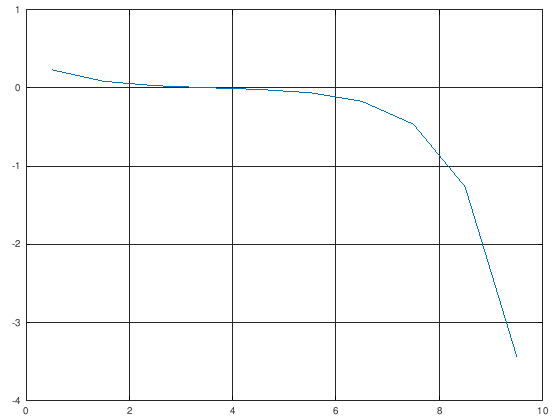

In [27]:
%% flow function
t=-(u(ELEMENTS(:,2))-u(ELEMENTS(:,1))).*MATERIALS./LENGTHS;
plot(POINTS(ELEMENTS(:,1))+LENGTHS/2,t)
grid on